<a href="https://colab.research.google.com/github/scardenol/RP_argos/blob/main/genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import random
# np.random.seed(42)

# array: np.array, [list, ..., list], list

def generate_population(P_size: 'tuple') -> 'array':
  P = 0.1*np.random.chisquare(df=1, size=P_size) # Initial population
  return P.tolist()

def mse(A: 'array', B: 'array') -> float: # Cleanest way to calculate MSE
  return np.square(np.subtract(A, B)).mean()

def fitness(X: 'array', Y: list, P: 'array', fun: 'function') -> list:
  '''
  X = [X1, X2, ..., Xn]: observations of predictors
  Y: observations of variable of interest
  P = [theta1, theta2, ..., thetan]: population (possible parameters)
  '''
  Y_bar = [[fun(*[item[i] for item in X], *P[j]) for i in range(len(X[0]))] for j in range(len(P))]
  fitness = [mse(Y_bar[i], Y) for i in range(len(P))]
  return fitness, Y_bar

def selection(P: 'array', fitness: list) -> 'array':
  return random.choices(population=P, weights=fitness, k=2)

def crossover(x: list, y: list) -> 'Tuple' : # Single point
  if len(x) != len(y):
    raise ValueError("Parents x and y need to be of same length")

  length = len(x)

  if length < 2:
    return x, y

  p = random.randint(1, length-1)
  return x[0:p] + y[p:], y[0:p] + x[p:]

def mutation(x: list, probability: float, num: int) -> list:
  for _ in range(num):
    index = random.randrange(len(x))
    value = random.randint(1,1)*np.random.uniform(-1.0, 1.0, 1) # Uniform mutation
    x[index] = x[index] if random.random() > probability else x[index] * value[0]
  return x

def evolution():
  return

In [15]:
X = [[1,2,3,4], [2.1, 4.1, 6.1, 8.1]]
Y = [2, 4, 6, 8]
P = [[0.1, 0.2, 0.3, 0.4], [0, 1, 2, 3], [4, 3, 2, 1], [10, 8, 6, 4], [4, 6, 8, 10]]

def fun(x1, x2, a, b, c, d):
  return (a*x1 + b*x2 + c + d)

fit, _ = fitness(X,Y,P,fun)
generate_population(np.array(P).shape)
sel = selection(P, fit)
print(sel)
x, y = crossover(sel[0], sel[1])
print(x, y)
mutation(x, 1, 1)
lambda X, Y, P, fun: fitness(X,Y,P,fun)

[[10, 8, 6, 4], [4, 6, 8, 10]]
[10, 8, 6, 10] [4, 6, 8, 4]


<function __main__.<lambda>>

In [16]:
m_prob = 0.5 # Probabilidad de mutación
P = generate_population((5,4)) # (individuos, parámetros)
generations = 200
for i in range(generations):
  fit, _ = fitness(X,Y,P,fun)
  P = [a for _, a in sorted(zip(fit, P))] # Ordena la población de menor a mayor fitness
  
  next_generation = P[0:2] # Guarda los 2 mejores

  for j in range(int(len(P) / 2) - 1):
    parents = selection(P,fit)
    x, y = crossover(parents[0], parents[1])
    x = mutation(x, m_prob, 1)
    next_generation += [x,y]

  P = next_generation
  fit, Y_bar = fitness(X,Y,P,fun)
  P = [a for _, a in sorted(zip(fit, P))] # Ordena la población de menor a mayor fitness
  display(i)
  print('')
  display(P)
  print('')
  display(fit)

print(f'best solution: {P[0]}')
print(f'Fitness: {fit[0]}')
print(f'Y_hat: {Y_bar[0]}')

0

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.038608643025930145,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.24339035157762906,
  0.0959845600191348,
  0.004660569956653924],
 [0.0530579936786346,
  0.24339035157762906,
  0.0959845600191348,
  0.004660569956653924]]

[0.03075950131920962,
 4.034790260967483,
 15.093668568829543,
 15.093668568829543]

1

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.038608643025930145,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.02182169575628502,
  0.6008211125797206,
  0.016820444246505247,
  0.004660569956653924],
 [0.0530579936786346,
  0.24339035157762906,
  0.0959845600191348,
  0.0022321489915459007]]

[0.03075950131920962,
 4.034790260967483,
 4.2125311111145916,
 15.110796869329333]

2

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.038608643025930145,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.24339035157762906,
  0.0959845600191348,
  0.0022321489915459007],
 [0.0530579936786346,
  0.24339035157762906,
  0.0959845600191348,
  -0.0016539202667094771]]

[0.03075950131920962,
 4.034790260967483,
 15.138230890405582,
 15.110796869329333]

3

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.038608643025930145,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.038608643025930145,
  0.24339035157762906,
  0.0959845600191348,
  -0.0016539202667094771]]

[0.03075950131920962, 4.034790260967483, 3.877405140239766, 15.447699009873975]

4

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.038608643025930145,
  0.6008211125797206,
  0.016820444246505247,
  -0.001837162242669562]]

[0.03075950131920962, 3.877405140239766, 4.0496210511637525, 3.877405140239766]

5

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.038608643025930145,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.029626846484605382,
  0.6008211125797206,
  0.016820444246505247,
  -0.001837162242669562]]

[0.03075950131920962, 3.877405140239766, 4.149213667600322, 4.034790260967483]

6

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  -0.001837162242669562],
 [0.029626846484605382,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 3.8919419359113445, 4.134200128776207]

7

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  -0.001837162242669562],
 [0.0530579936786346,
  0.2699027081748492,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 14.528427323010442,
 3.8919419359113445]

8

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.2699027081748492,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.2699027081748492,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 14.528427323010442,
 14.528427323010442]

9

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.2699027081748492,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.2699027081748492,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 14.528427323010442,
 14.528427323010442]

10

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.2699027081748492,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.2699027081748492,
  0.016820444246505247,
  -0.0011429343555167482]]

[0.03075950131920962, 3.877405140239766, 14.55187393354987, 14.528427323010442]

11

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.2699027081748492,
  0.016820444246505247,
  -0.0011429343555167482]]

[0.03075950131920962, 3.877405140239766, 14.55187393354987, 3.877405140239766]

12

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 23.294833222361, 3.877405140239766]

13

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.046587789707345936,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 5.026437266495884, 23.294833222361]

14

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 23.294833222361, 23.294833222361]

15

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -9.219465660916722e-05]]

[0.03075950131920962, 3.877405140239766, 23.315298881498165, 3.877405140239766]

16

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -2.7461805393562592e-05],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -9.219465660916722e-05]]

[0.03075950131920962,
 3.877405140239766,
 23.314728767671326,
 23.315298881498165]

17

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -2.7461805393562592e-05],
 [0.0530579936786346,
  0.08764799078502471,
  0.01094414240888523,
  -2.7461805393562592e-05]]

[0.03075950131920962,
 3.877405140239766,
 23.366516562071883,
 23.314728767671326]

18

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -2.7461805393562592e-05]]

[0.03075950131920962, 3.877405140239766, 23.314728767671326, 3.877405140239766]

19

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -2.7461805393562592e-05]]

[0.03075950131920962, 3.877405140239766, 23.31461134202291, 23.314728767671326]

20

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  -0.048300275769499246,
  0.016820444246505247,
  -1.4128740929102683e-05]]

[0.03075950131920962, 3.877405140239766, 31.198269554534455, 23.31461134202291]

21

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  -0.048300275769499246,
  0.016820444246505247,
  -1.4128740929102683e-05]]

[0.03075950131920962, 3.877405140239766, 31.198269554534455, 23.31461134202291]

22

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.08764799078502471,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  -0.048300275769499246,
  0.016820444246505247,
  -1.4128740929102683e-05]]

[0.03075950131920962, 3.877405140239766, 31.198269554534455, 23.31461134202291]

23

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.013474091156827519,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  -0.048300275769499246,
  0.016820444246505247,
  -1.4128740929102683e-05]]

[0.03075950131920962,
 3.877405140239766,
 27.473876493647985,
 31.198269554534455]

24

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.013474091156827519,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -1.4128740929102683e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.182909612514834,
 27.473876493647985]

25

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -1.4128740929102683e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.182909612514834,
 28.182909612514834]

26

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -1.4128740929102683e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.182909612514834,
 28.182909612514834]

27

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  0.0014052162420950043,
  -0.015770835834465938,
  -1.4128740929102683e-05]]

[0.03075950131920962, 3.877405140239766, 28.49967584900732, 28.182909612514834]

28

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -1.4128740929102683e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.182909612514834,
 28.182909612514834]

29

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  0.0014052162420950043,
  0.013482787016321305,
  -1.4128740929102683e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.215251851022906,
 28.182909612514834]

30

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.039232052108567735,
  0.6008211125797206,
  0.016820444246505247,
  -1.4128740929102683e-05],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 4.945582396398828, 28.161155495567687]

31

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0021869446923809144]]

[0.03075950131920962, 3.877405140239766, 28.20396188940468, 28.161155495567687]

32

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  -0.013761279512111653,
  -0.0021869446923809144]]

[0.03075950131920962, 3.877405140239766, 28.50126797487124, 28.161155495567687]

33

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.0014052162420950043,
  -0.013761279512111653,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0021869446923809144]]

[0.03075950131920962,
 3.877405140239766,
 30.052293437095813,
 28.458191294029636]

34

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0021869446923809144],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.0032581781857678243,
  -0.0021869446923809144]]

[0.03075950131920962,
 3.877405140239766,
 30.188151312323075,
 30.052293437095813]

35

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0021869446923809144],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.0032581781857678243,
  -0.0017070137920304383]]

[0.03075950131920962, 3.877405140239766, 30.18333740111105, 30.052293437095813]

36

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.0032581781857678243,
  -0.0021869446923809144]]

[0.03075950131920962,
 3.877405140239766,
 30.047492543784905,
 30.188151312323075]

37

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.047492543784905,
 30.047492543784905]

38

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.047492543784905,
 30.047492543784905]

39

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.047492543784905,
 30.047492543784905]

40

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0006314878747264355],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.036735407110555,
 30.047492543784905]

41

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0006314878747264355],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.036735407110555,
 30.047492543784905]

42

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0006314878747264355],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.047492543784905,
 30.036735407110555]

43

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383],
 [-0.009476250263942304,
  -0.000996012065352969,
  0.016820444246505247,
  -0.0017070137920304383]]

[0.03075950131920962, 3.877405140239766, 30.19426085074302, 30.047492543784905]

44

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383],
 [-0.009476250263942304,
  -0.000996012065352969,
  0.016820444246505247,
  -0.0017070137920304383]]

[0.03075950131920962, 3.877405140239766, 30.19426085074302, 30.047492543784905]

45

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  0.001574552701505512],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383]]

[0.03075950131920962, 3.877405140239766, 30.01467838962288, 30.047492543784905]

46

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.016820444246505247,
  -0.0017070137920304383],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.0046508411648230365,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.169371006539414,
 30.047492543784905]

47

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00825864649211562,
  0.0014052162420950043,
  0.0046508411648230365,
  -0.0017070137920304383],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.0046508411648230365,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.132751045278503,
 30.169371006539414]

48

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.0046508411648230365,
  -0.0017070137920304383],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.0046508411648230365,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.169371006539414,
 30.169371006539414]

49

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.0046508411648230365,
  -0.0017070137920304383],
 [-0.009476250263942304,
  0.0014052162420950043,
  -0.0036429143792731326,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.252602610004047,
 30.169371006539414]

50

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  0.0014052162420950043,
  0.0046508411648230365,
  -0.0017070137920304383],
 [-0.009476250263942304,
  0.0014052162420950043,
  -0.0036429143792731326,
  -0.0017070137920304383]]

[0.03075950131920962,
 3.877405140239766,
 30.252602610004047,
 30.169371006539414]

51

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  -0.0036429143792731326,
  -0.0017070137920304383],
 [-0.009476250263942304,
  -0.001379453891087727,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 30.178231651461367,
 3.9650744199804815]

52

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.001379453891087727,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.001379453891087727,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 30.178231651461367,
 30.178231651461367]

53

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.001379453891087727,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.001379453891087727,
  0.016820444246505247,
  0.0016652353204545337]]

[0.03075950131920962,
 3.877405140239766,
 30.183914345010315,
 30.178231651461367]

54

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.001379453891087727,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.001379453891087727,
  0.016820444246505247,
  0.0016652353204545337]]

[0.03075950131920962,
 3.877405140239766,
 30.178231651461367,
 30.183914345010315]

55

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.001379453891087727,
  0.016820444246505247,
  0.0016652353204545337],
 [-0.009476250263942304,
  -0.001379453891087727,
  0.016820444246505247,
  0.0009234458904075302]]

[0.03075950131920962,
 3.877405140239766,
 30.191350948806353,
 30.183914345010315]

56

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0009234458904075302],
 [-0.009476250263942304,
  -0.001379453891087727,
  -0.004881826612065845,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 30.39623202055544, 3.882076605951631]

57

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.001379453891087727,
  -0.004881826612065845,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 30.372631447474745, 30.39623202055544]

58

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004785956639441188,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007],
 [-0.009476250263942304,
  -0.001379453891087727,
  -0.004881826612065845,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.94364175567099, 30.39623202055544]

59

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004785956639441188,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007],
 [-0.00442310827449554,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 30.220290123501755, 29.94364175567099]

60

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004785956639441188,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007],
 [0.0007872908665803468,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 30.06360891443473, 29.94364175567099]

61

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004785956639441188,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007],
 [0.0007872908665803468,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.94364175567099, 30.06360891443473]

62

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004785956639441188,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007],
 [0.0007872908665803468,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0006123987312922432]]

[0.03075950131920962, 3.877405140239766, 30.079827687282965, 29.94364175567099]

63

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004785956639441188,
  5.482357435839353e-05,
  -0.004881826612065845,
  0.0022321489915459007],
 [0.004785956639441188,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.879695858116335, 29.94364175567099]

64

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004785956639441188,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 30.06113316069564, 29.94364175567099]

65

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 30.06113316069564, 30.06113316069564]

66

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  -0.004881826612065845,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  -0.004881826612065845,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 30.10041568283729, 30.06113316069564]

67

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0008697303402004313,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -0.0009950151499043425,
  -0.004881826612065845,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 28.552577016075908, 4.460621256159979]

68

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  -0.004881826612065845,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 30.10041568283729, 3.877405140239766]

69

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  -0.004881826612065845,
  -0.0016902109679691895],
 [0.0008697303402004313,
  -0.0009950151499043425,
  -0.004881826612065845,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 30.10041568283729, 30.10041568283729]

70

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  -0.004881826612065845,
  -0.0016902109679691895],
 [0.0008697303402004313,
  -0.0009950151499043425,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.84434054854404, 3.969496325474486]

71

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  -0.004881826612065845,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  0.016820444246505247,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 29.8834528224492, 3.955314811825663]

72

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  0.016820444246505247,
  -0.0016902109679691895],
 [-0.00032956341626838885,
  -0.0009950151499043425,
  0.016820444246505247,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 29.919372444652026, 29.8834528224492]

73

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  0.016820444246505247,
  -0.0016902109679691895],
 [-0.00032956341626838885,
  -0.0009950151499043425,
  0.016820444246505247,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 29.8834528224492, 29.919372444652026]

74

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0008697303402004313,
  -0.0009950151499043425,
  0.016820444246505247,
  -0.0016902109679691895],
 [-0.00032956341626838885,
  -0.0009950151499043425,
  0.016820444246505247,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 29.8834528224492, 29.919372444652026]

75

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  0.016820444246505247,
  -0.0016902109679691895],
 [-0.00032956341626838885,
  -0.0009950151499043425,
  0.016820444246505247,
  -0.0016902109679691895]]

[0.03075950131920962,
 3.877405140239766,
 29.869378694455342,
 29.919372444652026]

76

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00032956341626838885,
  -0.0009950151499043425,
  0.016820444246505247,
  -0.0016902109679691895],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895]]

[0.03075950131920962,
 3.877405140239766,
 30.093616400877654,
 29.919372444652026]

77

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895]]

[0.03075950131920962,
 3.877405140239766,
 30.093616400877654,
 30.093616400877654]

78

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895]]

[0.03075950131920962,
 3.877405140239766,
 30.093616400877654,
 30.093616400877654]

79

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895]]

[0.03075950131920962,
 3.877405140239766,
 30.093616400877654,
 30.093616400877654]

80

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.00023508569068259237],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895]]

[0.03075950131920962,
 3.877405140239766,
 30.079041030508062,
 30.093616400877654]

81

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00032956341626838885,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 30.05867588365595, 30.093616400877654]

82

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00032956341626838885,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.0016902109679691895],
 [-0.00020890098802947945,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 30.075416501697585,
 30.073246304551105]

83

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00032956341626838885,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895]]

[0.03075950131920962, 3.877405140239766, 30.05867588365595, 30.08999099417243]

84

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237],
 [-0.00032956341626838885,
  -0.00017399151169242215,
  -0.005613206815001074,
  -0.0016902109679691895]]

[0.03075950131920962,
 3.877405140239766,
 30.055052582088095,
 30.093616400877654]

85

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 30.055052582088095,
 30.055052582088095]

86

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  -0.003991176942861341,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 30.038816886465945,
 30.055052582088095]

87

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  0.00010247574809999254,
  -0.005613206815001074,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 30.05853313223578, 30.055052582088095]

88

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 30.055052582088095,
 30.055052582088095]

89

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  0.00015947983931323867,
  -0.005613206815001074,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 29.946955526703732,
 30.055052582088095]

90

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 29.946955526703732,
 29.946955526703732]

91

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 29.946955526703732,
 29.946955526703732]

92

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  0.00010142902758559411],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.94359402763363, 29.946955526703732]

93

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  4.07233131889154e-05],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 29.944200409931607,
 29.946955526703732]

94

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  -0.00014733947139853072,
  0.005196169016113527,
  4.07233131889154e-05]]

[0.03075950131920962,
 3.877405140239766,
 29.962901838116153,
 29.946955526703732]

95

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  0.00015947983931323867,
  0.005196169016113527,
  4.07233131889154e-05],
 [-0.00020890098802947945,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.96565781804827, 29.944200409931607]

96

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00020890098802947945,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.96565781804827, 29.96565781804827]

97

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237],
 [-0.00020890098802947945,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.9567753827259, 29.96565781804827]

98

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.9567753827259, 29.9567753827259]

99

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  0.00020008021153322726],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.952427766973244, 29.9567753827259]

100

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.9567753827259, 29.9567753827259]

101

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.9567753827259, 29.9567753827259]

102

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [8.737178003144502e-05,
  -0.00011092565788444167,
  0.005196169016113527,
  -0.00023508569068259237],
 [8.737178003144502e-05,
  -0.00014733947139853072,
  0.005196169016113527,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.954555788157514, 29.9567753827259]

103

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [8.737178003144502e-05,
  -0.00011092565788444167,
  0.005196169016113527,
  -0.00023508569068259237],
 [8.737178003144502e-05,
  -0.00011092565788444167,
  0.00030441266302967484,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 30.003452141876693,
 29.954555788157514]

104

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [8.737178003144502e-05,
  -0.00011092565788444167,
  0.005196169016113527,
  -0.00023508569068259237],
 [4.924460320294247e-05,
  -0.00011092565788444167,
  0.00030441266302967484,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 30.00459603389247, 29.954555788157514]

105

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  -0.00011092565788444167,
  0.00030441266302967484,
  -0.00023508569068259237],
 [4.924460320294247e-05,
  -0.00011092565788444167,
  0.00030441266302967484,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 30.00459603389247, 30.00459603389247]

106

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  -0.00011092565788444167,
  0.00030441266302967484,
  -0.00023508569068259237],
 [4.924460320294247e-05,
  -0.00011092565788444167,
  6.852506017878779e-05,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 30.006955141669312, 30.00459603389247]

107

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  -0.00023508569068259237],
 [4.924460320294247e-05,
  -0.00011092565788444167,
  0.00030441266302967484,
  -0.00023508569068259237]]

[0.03075950131920962, 3.877405140239766, 29.997355188197634, 30.00459603389247]

108

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  -0.00023508569068259237],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 29.997355188197634,
 29.997355188197634]

109

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.00011174486749635283],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  -0.00023508569068259237]]

[0.03075950131920962,
 3.877405140239766,
 29.993887137075344,
 29.997355188197634]

110

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  -0.00023508569068259237],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.972689883048297,
 3.8862148870554423]

111

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.972689883048297,
 29.972689883048297]

112

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.972689883048297,
 29.972689883048297]

113

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.972689883048297,
 29.972689883048297]

114

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.972689883048297,
 29.972689883048297]

115

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [4.924460320294247e-05,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [5.370571325274053e-06,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.974005519183287,
 29.972689883048297]

116

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [5.370571325274053e-06,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [5.370571325274053e-06,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.974005519183287,
 29.974005519183287]

117

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [5.370571325274053e-06,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [5.370571325274053e-06,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.974005519183287,
 29.974005519183287]

118

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [5.370571325274053e-06,
  4.644496189281724e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [5.370571325274053e-06,
  1.7315040380595012e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.97578169844013, 29.974005519183287]

119

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [5.370571325274053e-06,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [5.370571325274053e-06,
  1.7315040380595012e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.97578069358594, 29.97578169844013]

120

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [5.370571325274053e-06,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [5.370571325274053e-06,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.97578069358594, 29.97578069358594]

121

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [5.370571325274053e-06,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [1.8161420726065861e-06,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.975887283505102, 29.97578069358594]

122

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.8161420726065861e-06,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [-3.229585432178098e-07,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.975951430762006,
 29.975887283505102]

123

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-3.229585432178098e-07,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [-3.229585432178098e-07,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.975951430762006,
 29.975951430762006]

124

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-3.229585432178098e-07,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [-3.229585432178098e-07,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.975951430762006,
 29.975951430762006]

125

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [-3.229585432178098e-07,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.97594121779164, 29.975951430762006]

126

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [-3.229585432178098e-07,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.001235207628971369]]

[0.03075950131920962, 3.877405140239766, 29.98591707637464, 29.97594121779164]

127

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.97594121779164, 29.97594121779164]

128

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.00021451583977472236]]

[0.03075950131920962, 3.877405140239766, 29.996111979462526, 29.97594121779164]

129

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.00021451583977472236],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.00021451583977472236]]

[0.03075950131920962,
 3.877405140239766,
 29.996111979462526,
 29.996111979462526]

130

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  6.852506017878779e-05,
  0.00021451583977472236],
 [1.761036700926104e-08,
  9.747501855767231e-06,
  6.852506017878779e-05,
  0.00021451583977472236]]

[0.03075950131920962,
 3.877405140239766,
 29.996574576306145,
 29.996111979462526]

131

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  9.747501855767231e-06,
  6.852506017878779e-05,
  0.00021451583977472236],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  -1.914306586058709e-05,
  0.00021451583977472236]]

[0.03075950131920962, 3.877405140239766, 29.99698860327547, 29.996574576306145]

132

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  9.747501855767231e-06,
  6.852506017878779e-05,
  0.00021451583977472236],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  -1.914306586058709e-05,
  0.00021451583977472236]]

[0.03075950131920962, 3.877405140239766, 29.99698860327547, 29.996574576306145]

133

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  -1.914306586058709e-05,
  0.00021451583977472236],
 [1.761036700926104e-08,
  -3.6076919766069443e-06,
  -1.914306586058709e-05,
  0.00021451583977472236]]

[0.03075950131920962, 3.877405140239766, 29.9982658445604, 29.99698860327547]

134

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  -1.914306586058709e-05,
  0.00021451583977472236],
 [1.761036700926104e-08,
  -3.6076919766069443e-06,
  -1.914306586058709e-05,
  0.00021451583977472236]]

[0.03075950131920962, 3.877405140239766, 29.99698860327547, 29.9982658445604]

135

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  -1.914306586058709e-05,
  0.00021451583977472236],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  -1.914306586058709e-05,
  0.00021451583977472236]]

[0.03075950131920962, 3.877405140239766, 29.99698860327547, 29.99698860327547]

136

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  -1.914306586058709e-05,
  0.00021451583977472236],
 [1.761036700926104e-08,
  1.733152007447185e-05,
  -1.914306586058709e-05,
  0.00021451583977472236]]

[0.03075950131920962, 3.877405140239766, 29.99698860327547, 29.99698860327547]

137

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.00021451583977472236],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.978922451322873, 3.884608589209207]

138

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.978922451322873,
 29.978922451322873]

139

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 3.877405140239766, 29.978922451322873]

140

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0001645308581529285]]

[0.03075950131920962,
 3.877405140239766,
 29.999594118725014,
 29.978922451322873]

141

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.1528502002404788e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.97717133575666, 29.978922451322873]

142

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.1528502002404788e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.978922451322873, 29.97717133575666]

143

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  1.1528502002404788e-05,
  -1.3667410950099222e-06,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.976993653595116,
 29.978922451322873]

144

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.978922451322873,
 29.978922451322873]

145

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [1.761036700926104e-08,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [2.2274033645050705e-10,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.978922972768395,
 29.978922451322873]

146

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [2.2274033645050705e-10,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [2.2274033645050705e-10,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.978922972768395,
 29.978922972768395]

147

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [2.2274033645050705e-10,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.978922980014655,
 29.978922972768395]

148

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.978922980014655,
 29.978922980014655]

149

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  3.0482400393820237e-06,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.97870116177637, 29.978922980014655]

150

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [5.27937563730623e-12,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.978922979289933,
 29.978922980014655]

151

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  5.966067358663775e-06,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  -1.914306586058709e-05,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.97867199604396, 29.978922980014655]

152

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  5.966067358663775e-06,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  0.016820444246505247,
  0.0001162558042084077]]

[0.03075950131920962,
 3.877405140239766,
 29.831965411725257,
 3.9376857839286297]

153

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  0.016820444246505247,
  0.0001162558042084077],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  0.016820444246505247,
  0.0001162558042084077]]

[0.03075950131920962,
 3.877405140239766,
 29.831965411725257,
 29.831965411725257]

154

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  0.016820444246505247,
  0.0001162558042084077],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  0.016820444246505247,
  0.0001162558042084077]]

[0.03075950131920962,
 3.877405140239766,
 29.831965411725257,
 29.831965411725257]

155

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  0.016820444246505247,
  0.0001162558042084077],
 [-1.8886526930894634e-11,
  -1.718885485173687e-05,
  0.016820444246505247,
  0.0001162558042084077]]

[0.03075950131920962,
 3.877405140239766,
 29.831965411725257,
 29.831965411725257]

156

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-1.8886526930894634e-11,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05]]

[0.03075950131920962, 3.877405140239766, 28.266504064083772, 4.470686793566584]

157

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-9.565949025867246e-12,
  0.6008211125797206,
  0.016820444246505247,
  4.414915660189866e-05],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 4.479079320759173, 28.24528272332587]

158

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-9.565949025867246e-12,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05]]

[0.03075950131920962, 3.877405140239766, 4.470686793458655, 28.266504064083772]

159

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.266504064083772,
 28.266504064083772]

160

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.266504064083772,
 28.266504064083772]

161

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  3.940365381372771e-05]]

[0.03075950131920962, 3.877405140239766, 28.26655010096995, 28.266504064083772]

162

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.266504064083772,
 28.266504064083772]

163

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05],
 [0.02479789516805612,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05]]

[0.03075950131920962, 3.877405140239766, 29.0954372465246, 28.266504064083772]

164

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  -2.8470050706881233e-05],
 [0.02479789516805612,
  -1.718885485173687e-05,
  0.016820444246505247,
  4.414915660189866e-05]]

[0.03075950131920962, 3.877405140239766, 28.26720855962845, 29.0954372465246]

165

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  -3.390266894742353e-05],
 [0.02479789516805612,
  -1.718885485173687e-05,
  0.016820444246505247,
  -2.8470050706881233e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.267261263124954,
 29.096152003199037]

166

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  -2.8470050706881233e-05],
 [0.02479789516805612,
  -1.718885485173687e-05,
  0.016820444246505247,
  -3.390266894742353e-05]]

[0.03075950131920962, 3.877405140239766, 29.096205474327178, 28.26720855962845]

167

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  -2.8470050706881233e-05],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  -2.8470050706881233e-05]]

[0.03075950131920962, 3.877405140239766, 28.266509496939875, 28.26720855962845]

168

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  -2.8470050706881233e-05],
 [0.019302571745842743,
  -5.3825877348533125e-06,
  0.016820444246505247,
  -2.8470050706881233e-05]]

[0.03075950131920962, 3.877405140239766, 29.25802438501568, 28.26720855962845]

169

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -1.718885485173687e-05,
  0.016820444246505247,
  -2.8470050706881233e-05],
 [0.019302571745842743,
  -5.3825877348533125e-06,
  0.016820444246505247,
  -2.8470050706881233e-05]]

[0.03075950131920962, 3.877405140239766, 29.25802438501568, 28.26720855962845]

170

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  -2.8470050706881233e-05],
 [0.019302571745842743,
  -1.718885485173687e-05,
  0.016820444246505247,
  -2.8470050706881233e-05]]

[0.03075950131920962, 3.877405140239766, 29.25873560273286, 28.266509496939875]

171

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  1.3365466147549873e-05,
  0.016820444246505247,
  -2.8470050706881233e-05],
 [0.019302571745842743,
  -5.3825877348533125e-06,
  0.016820444246505247,
  -2.8470050706881233e-05]]

[0.03075950131920962, 3.877405140239766, 28.26539942081664, 29.25802438501568]

172

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  -2.8470050706881233e-05],
 [0.019302571745842743,
  1.3365466147549873e-05,
  0.016820444246505247,
  -2.8470050706881233e-05]]

[0.03075950131920962,
 3.877405140239766,
 29.256895007014137,
 28.266509496939875]

173

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  -7.717361822131453e-06],
 [0.019302571745842743,
  1.3365466147549873e-05,
  0.016820444246505247,
  -2.8470050706881233e-05]]

[0.03075950131920962,
 3.877405140239766,
 28.266308171779738,
 29.256895007014137]

174

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  -0.0011524971156934465,
  -7.717361822131453e-06],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 3.9499376345397, 28.244583932869915]

175

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  4.791032881458842e-07,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 28.24423699375817, 28.244583932869915]

176

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 3.877405140239766, 28.244583932869915]

177

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  -0.002180030437783508],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 3.8931682763520676,
 28.244583932869915]

178

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 28.244583932869915, 3.877405140239766]

179

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 28.244583932869915,
 28.244583932869915]

180

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.05174729248595839,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 5.089987926195061, 28.244583932869915]

181

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.686967376857368,
 28.244583932869915]

182

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.01327815573854522,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.414404746778736,
 29.686967376857368]

183

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.01327815573854522,
  -5.3825877348533125e-06,
  0.00293918566027254,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.551960248581615,
 29.686967376857368]

184

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.007339474738645854,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.78131071474258, 29.686967376857368]

185

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.007339474738645854,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.686967376857368, 29.78131071474258]

186

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.007339474738645854,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.78131071474258, 29.686967376857368]

187

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0021590232827665866],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.007339474738645854,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.687694349026515, 29.78131071474258]

188

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.016820444246505247,
  0.0021590232827665866],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.007339474738645854,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.78131071474258, 29.687694349026515]

189

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0021590232827665866],
 [0.004123890344569869,
  -5.3825877348533125e-06,
  0.007339474738645854,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.687202145903115, 29.78131071474258]

190

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.0530579936786346,
  0.6008211125797206,
  -0.001634640768958217,
  0.0021590232827665866],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 3.9438613428619025,
 29.686475179784082]

191

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.6890092285623867e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 29.68647759260852, 29.686475179784082]

192

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.686475179784082,
 29.686475179784082]

193

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.686475179784082,
 29.686475179784082]

194

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  4.019235679881197e-07,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.686616372483925,
 29.686475179784082]

195

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00234524790214029,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.879846222347823,
 29.686475179784082]

196

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.00234524790214029,
  2.7287725062568408e-06,
  -0.003148323168840623,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 30.07940533731648, 29.686475179784082]

197

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.042309395470926076,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 3.994182615630968, 29.686475179784082]

198

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962,
 3.877405140239766,
 29.686475179784082,
 29.686475179784082]

199

[[0.017993405573442988,
  0.9857749665219719,
  0.0338682504345929,
  0.06868968943108826],
 [0.0530579936786346,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [0.004123890344569869,
  0.6008211125797206,
  0.016820444246505247,
  0.0022321489915459007],
 [-0.0427247233312698,
  2.7287725062568408e-06,
  0.016820444246505247,
  0.0022321489915459007]]

[0.03075950131920962, 3.877405140239766, 31.101029719403936, 4.423060957315988]

best solution: [0.017993405573442988, 0.9857749665219719, 0.0338682504345929, 0.06868968943108826]
Fitness: 0.03075950131920962
Y_hat: [2.1906787751352654, 4.180222113752652, 6.169765452370039, 8.159308790987426]


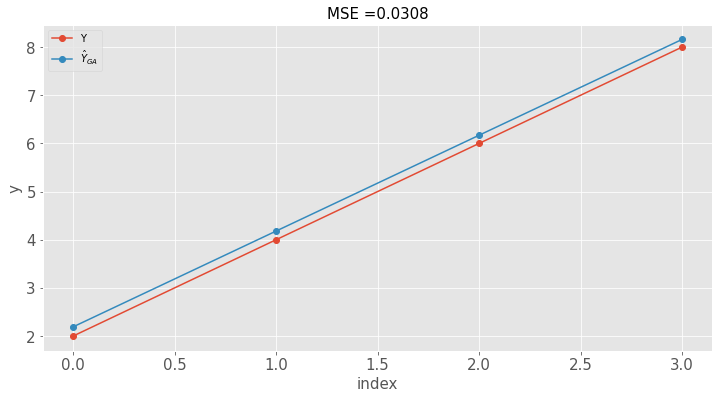

In [17]:
import matplotlib.pyplot as plt #gráficas
import matplotlib as mpl
import seaborn as sns #gráficas
plt.style.use('ggplot') #estilo de graficas

mse_GA = mse(Y_bar[0],Y)
T = list(range(len(Y)))

# Plot data and results
plt.figure(figsize = (12, 6));
plt.plot(T, Y, '-o', label='Y')
plt.plot(T, Y_bar[0], '-o', label='$\hat{Y}_{GA}$')
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
plt.xlabel('index', fontsize = 15);
plt.ylabel('y', fontsize = 15);
plt.legend()
plt.title('MSE =' + str(round(mse_GA, 4)), fontsize = 15);